In [ ]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Functions of One variable


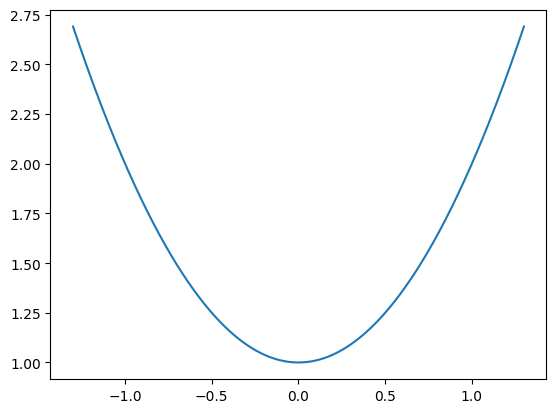

In [ ]:
f = lambda x: x**2 + 1 # a x^T x + 0*x + 1

x = np.linspace(-1.3,1.3,500)
plt.plot(x, f(x))
plt.show()

In [ ]:
sol = opt.minimize_scalar(f)
sol

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 1.0
       x: 9.803862664247969e-09
     nit: 36
    nfev: 39

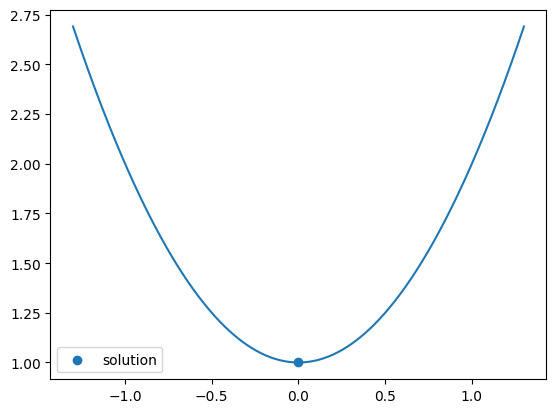

In [ ]:
x = np.linspace(-1.3,1.3,500)
plt.plot(x, f(x))
plt.scatter([sol.x], [sol.fun], label='solution')
plt.legend()
plt.show()

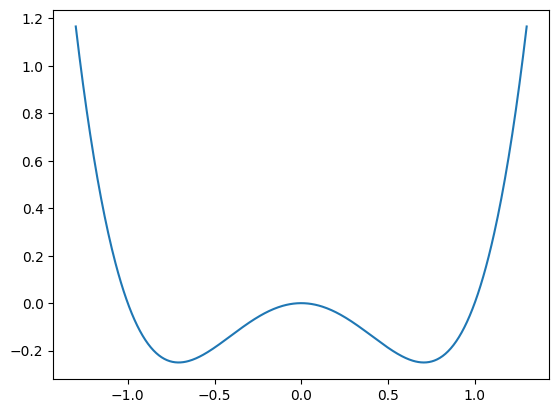

In [ ]:
f = lambda x: x**4 -x**2
x = np.linspace(-1.3,1.3,500)
plt.plot(x, f(x))
plt.show()

In [ ]:
sol = opt.minimize_scalar(f)
sol

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.24999999999999994
       x: 0.7071067853059209
     nit: 11
    nfev: 14

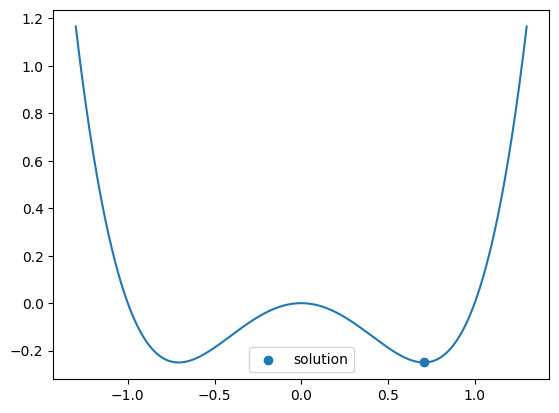

In [ ]:
sol = opt.minimize_scalar(f)

plt.plot(x, f(x))
plt.scatter([sol.x], [sol.fun], label='solution')
plt.legend()
plt.show()

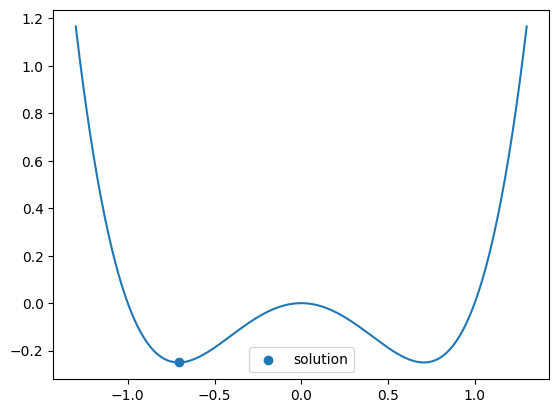

In [ ]:
sol = opt.minimize_scalar(f,bounds=(-1, 0), method='bounded')
plt.plot(x, f(x))
plt.scatter([sol.x], [sol.fun], label='solution')
plt.legend()
plt.show()



# Functions of Multiple Variables

You might also wish to minimize functions of multiple variables. In this case, you use opt.minimize. A multivariate quadratic generally has the form

$$x^T A x + b^T x + c$$,

where x is an n-dimensional vector, $A$ is a $n \times n$ matrix, b is a n-dimensional vector, and c is a scalar. When $A$ is positive definite (PD), there is a unique minimum.

In [ ]:
n = 2
A = np.random.randn(n+1,n)
A = A.T @ A # generates positive-definite matrix

b = np.random.rand(n)

f = lambda x : np.dot(x - b, A @ (x - b)) # (x - b)^T A (x - b)

sol = opt.minimize(f, np.zeros(n))
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.802035023523669e-15
        x: [ 4.358e-01  7.818e-01]
      nit: 3
      jac: [-1.486e-10  1.698e-10]
 hess_inv: [[ 7.999e-01  5.580e-01]
            [ 5.580e-01  4.714e-01]]
     nfev: 15
     njev: 5

In [ ]:
print(sol.x)
print(b)
print(np.linalg.norm(sol.x - b))

[0.43576132 0.78179941]
[0.43576142 0.78179949]
1.1842155777126845e-07


In [ ]:
# We can increase the dimension of the problem to be much greater
n = 100
A = np.random.randn(n+1,n)
A = A.T @ A

b = np.random.rand(n)

f = lambda x : np.dot(x - b, A @ (x - b)) # (x - b)^T A (x - b)

sol = opt.minimize(f, np.zeros(n))

print(la.norm(sol.x - b))

7.775063191639893e-05


# Constraints

Passing in a function to be optimized is fairly straightforward. Constraints are slightly less trivial. These are specified using classes LinearConstraint and NonlinearConstraint



*   Linear constraints take the form lb <= A @ x <= ub.
*   Nonlinear constraints take the form lb <= fun(x) <= ub.

$$ \begin{equation} \begin{cases} -1 \le x_0 \le 1\ c \le A * x \le d \end{cases} \end{equation}$$

In [ ]:
from scipy.optimize import Bounds, LinearConstraint

# constraint 1
C1 = Bounds(np.array([-1, -np.inf]), np.array([1,np.inf]))

# constraint 2
A = np.array([[1,1],[0,1]])
c = -2 * np.ones(2)
d = 2 * np.ones(2)
C2 = LinearConstraint(A, c, d)

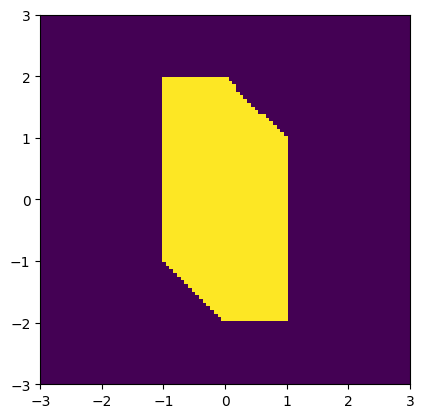

In [ ]:
n = 100
xx, yy = np.meshgrid(np.linspace(-3,3,n), np.linspace(-3,3,n))

C = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        x = np.array([xx[i,j], yy[i,j]])
        # constraint 1
        c1 = -1 <= xx[i,j] <= 1
        # constraint 2
        c2 = np.all((c <= A@x, A@x <= d))
        C[i,j] = c1 and c2

plt.imshow(C, extent=(-3,3,-3,3), origin='lower')
plt.show()

Now, let’s say we want to minimize a function $f(x)$ subject to x obeying the constraints given above. We can simply pass in the constraints

In [ ]:
# Considering f=2x+3y

f = lambda x : 2*x[0]+3*x[1]
sol = opt.minimize(f, np.random.rand(2), bounds=C1, constraints=(C2,))
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -6.000000000000491
       x: [-5.296e-14 -2.000e+00]
     nit: 3
     jac: [ 2.000e+00  3.000e+00]
    nfev: 9
    njev: 3

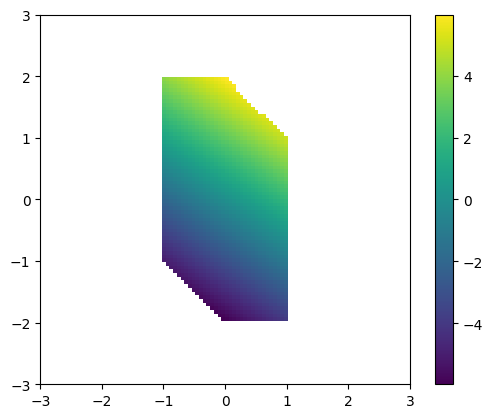

In [ ]:
F = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if C[i,j]:
            F[i,j] = f([xx[i,j], yy[i,j]])
        else:
            F[i,j] = np.nan

plt.imshow(F, extent=(-3,3,-3,3), origin='lower')
plt.colorbar()
plt.show()

In [ ]:
# Considering f=-2x-3y

f = lambda x : -2*x[0]-3*x[1]
sol = opt.minimize(f, np.random.rand(2), bounds=C1, constraints=(C2,))
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -5.999999999999101
       x: [-1.040e-13  2.000e+00]
     nit: 3
     jac: [-2.000e+00 -3.000e+00]
    nfev: 9
    njev: 3

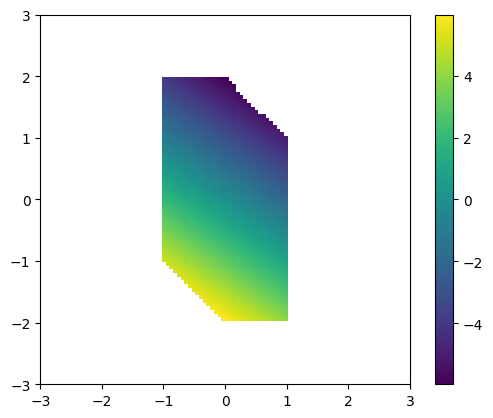

In [ ]:
F = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if C[i,j]:
            F[i,j] = f([xx[i,j], yy[i,j]])
        else:
            F[i,j] = np.nan

plt.imshow(F, extent=(-3,3,-3,3), origin='lower')
plt.colorbar()
plt.show()

In [ ]:
# Considering f=xy

f = lambda x : x[0]*x[1]
sol = opt.minimize(f, np.random.rand(2), bounds=C1, constraints=(C2,))
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.9999999999955531
       x: [-1.000e+00  2.000e+00]
     nit: 5
     jac: [ 2.000e+00 -1.000e+00]
    nfev: 15
    njev: 5

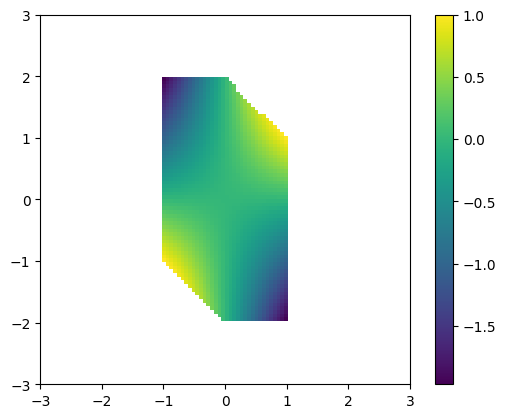

In [ ]:
F = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if C[i,j]:
            F[i,j] = f([xx[i,j], yy[i,j]])
        else:
            F[i,j] = np.nan

plt.imshow(F, extent=(-3,3,-3,3), origin='lower')
plt.colorbar()
plt.show()

# Nonlinear Constraints

Nonlinear constraints can be used to define more complicated domains. For instance, let’s look at the constraint

$$\begin{equation} 1 \le | x |_2 \le 2 \end{equation}$$

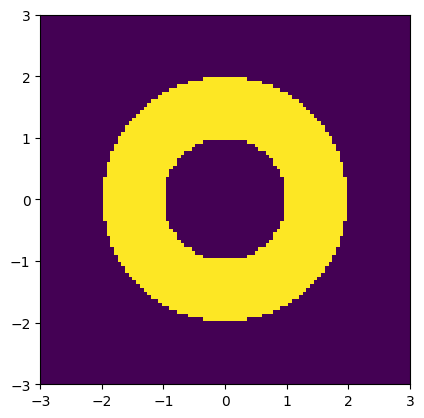

In [ ]:
n = 100
xx, yy = np.meshgrid(np.linspace(-3,3,n), np.linspace(-3,3,n))

C = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        x = np.array([xx[i,j], yy[i,j]])
        C[i,j] = 1 <= np.linalg.norm(x) <= 2

plt.imshow(C, extent=(-3,3,-3,3), origin='lower')
plt.show()

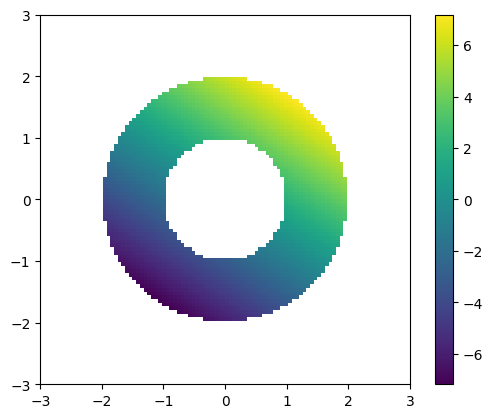

In [ ]:
f = lambda x : 2*x[0]+3*x[1]

F = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if C[i,j]:
            F[i,j] = f([xx[i,j], yy[i,j]])
        else:
            F[i,j] = np.nan

plt.imshow(F, extent=(-3,3,-3,3), origin='lower')
plt.colorbar()
plt.show()

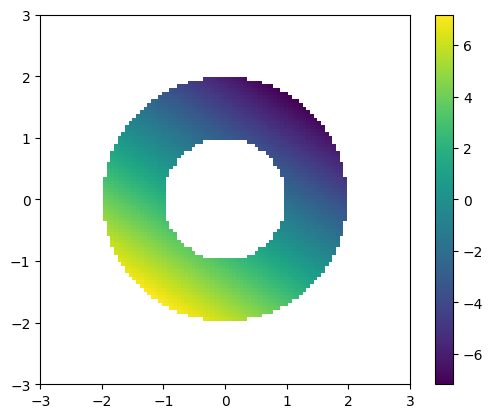

In [ ]:
f = lambda x : -2*x[0]-3*x[1]

F = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if C[i,j]:
            F[i,j] = f([xx[i,j], yy[i,j]])
        else:
            F[i,j] = np.nan

plt.imshow(F, extent=(-3,3,-3,3), origin='lower')
plt.colorbar()
plt.show()

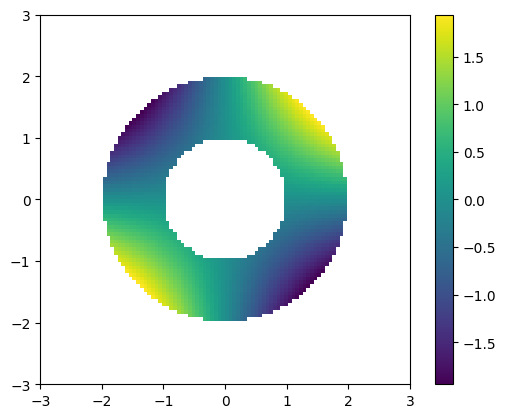

In [ ]:
f = lambda x : x[0]*x[1]

F = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if C[i,j]:
            F[i,j] = f([xx[i,j], yy[i,j]])
        else:
            F[i,j] = np.nan

plt.imshow(F, extent=(-3,3,-3,3), origin='lower')
plt.colorbar()
plt.show()